# 2 - COMPUTER VISION - Sobel operator in X and Y direction
    The aim of this program is to implement Sobel Operator


In [3]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

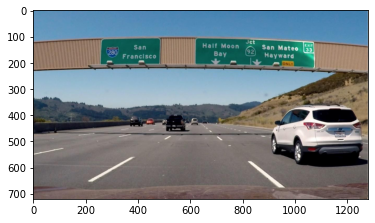

In [38]:
img = mpimg.imread('images/signs_vehicles_xygrad.png')
plt.imshow(img)

In [51]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply cv2.Sobel()
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)

    # Take the absolute value of the output from cv2.Sobel()    
    abs_sobelx = np.absolute(sobelx)

    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Apply lower and upper thresholds
    sxbinary = np.zeros_like(scaled_sobel)

    # Create binary_output
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    return sxbinary

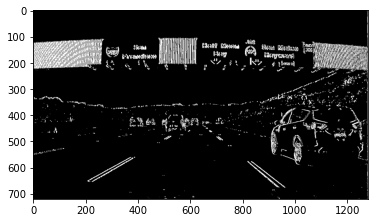

In [75]:
value = abs_sobel_thresh(img, orient='x', thresh_min=20, thresh_max=100)
plt.imshow(value, cmap='gray')

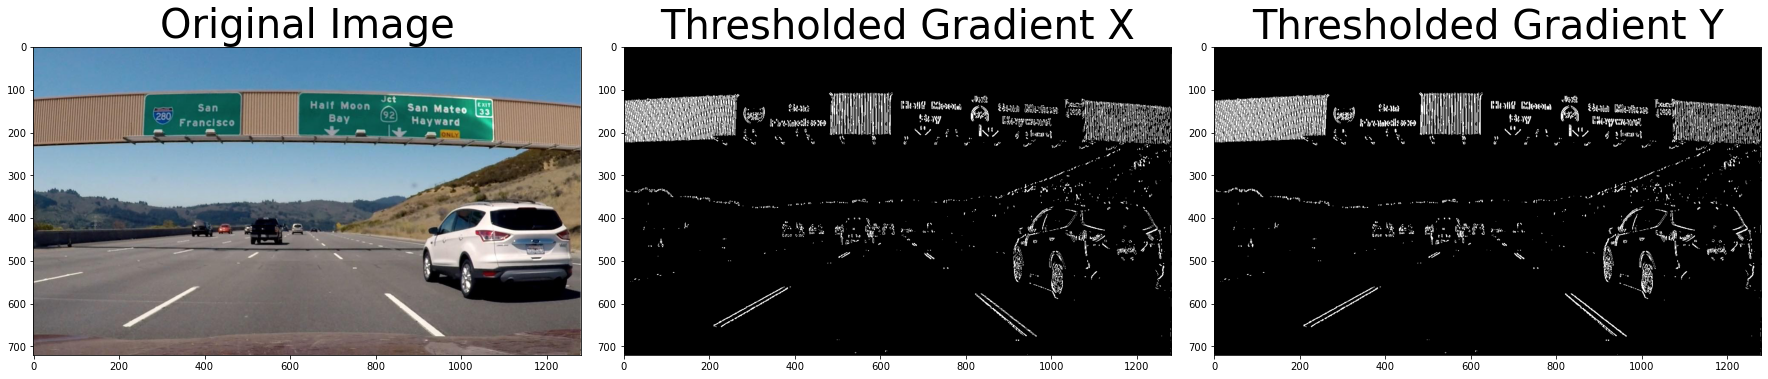

In [89]:
# Run the function
grad_binary_x = abs_sobel_thresh(img, orient='x', thresh_min=30, thresh_max=80)
grad_binary_y = abs_sobel_thresh(img, orient='x', thresh_min=30, thresh_max=100)

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(grad_binary_x, cmap='gray')
ax2.set_title('Thresholded Gradient X', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

ax3.imshow(grad_binary_y, cmap='gray')
ax3.set_title('Thresholded Gradient Y', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)